In [25]:
import pandas
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
data = pandas.read_csv('../../datasets//dataset-3.csv', sep=';')
data.head()

,N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,idade_meses,reg_procedencia
0,1,solteiro,ensino fundamental,NaN,"4,00",26,3,interior
1,2,casado,ensino fundamental,1.0,"4,56",32,10,capital
2,3,casado,ensino fundamental,2.0,"5,25",36,5,capital
3,4,solteiro,ensino médio,NaN,"5,73",20,10,outra
4,5,solteiro,ensino fundamental,NaN,"6,26",40,7,outra


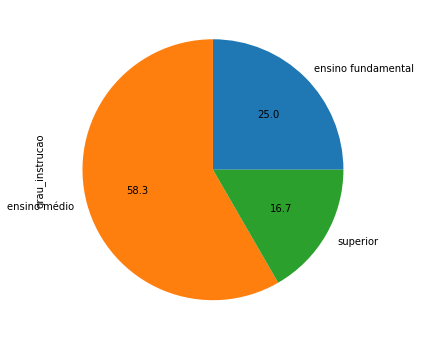

In [22]:
data[data['reg_procedencia'] == 'interior'] \
    .groupby('grau_instrucao')['grau_instrucao'] \
    .count() \
    .plot \
    .pie(autopct='%.1f')

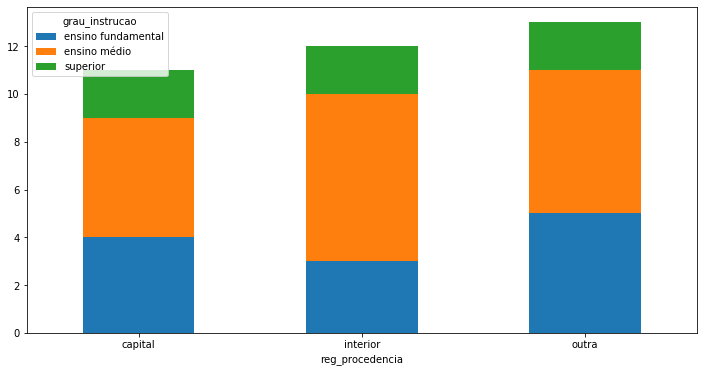

In [23]:
crosstab = pandas.crosstab(data.reg_procedencia, data.grau_instrucao)
crosstab.plot.bar(stacked=True, rot=0)

Variáveis independentes

In [28]:
chi2_contingency(crosstab)[:2]

(0.6614219114219115, 0.9559997732338883)

In [33]:
data['salario'] = data.salario.apply(lambda x : float(x.replace(',', '.')))
data[['salario']].describe()

,salario
count,36.000000
mean,11.122222
std,4.587458
min,4.000000
25%,7.552500
50%,10.165000
75%,14.060000
max,23.300000
